<a href="https://colab.research.google.com/github/micazev/replanejando_bauru/blob/main/Bauru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)
     |████████████████████████████████| 225kB 31.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=0e8f3732e82d61f7b19e6e23105d81cf68639d098e07835c5015dc18b2b1afe2
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)


In [9]:
import geopandas as gpd

In [15]:
curvas_10 = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/curvas_10_10.shp")
cursos_dagua = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/cursos_dagua.shp")
ferrovia = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/ferrovia.shp")
limite_municipal = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/limite_municipal.shp")
loteamentos_bauru = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/loteamentos_bauru.shp")
mancha_urbana = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/mancha_urbana_(planodemanejo).shp")
massa_dagua = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/massa_dagua.shp")
municipios_sp = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/municipios_vizinhos.shp")
perimetro_urbano_2018 = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/perimetro_urbano_2018.shp")
rodovias = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/rodovias.shp")
setores_planejamento = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/setores_planejamento.shp")
vias_locais = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/vias_locais.shp")
vias_principais = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/vias_principais.shp")
vias_rurais = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/vias_rurais.shp")
estados_ibge = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/estados(ibge).shp")
perimetro_municipal = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/perimetro_municipal(pd2008).shp")
# perimetro_sp = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/perimetro_sp.shp")
regiao_adm = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/região_adm.shp")

In [12]:
curvas_10.head()

,FID_perím,OBJECTID,Shape_Leng,Shape_Area,FID_teste_,ID,CONTOUR,geometry
0,0,1,152601.229838,6.719439e+08,1191,1192,580,"LINESTRING Z (692816.791 7559189.849 0.000, 69..."
1,0,1,152601.229838,6.719439e+08,1195,1196,580,"LINESTRING Z (692729.983 7559101.326 0.000, 69..."
2,0,1,152601.229838,6.719439e+08,1225,1226,540,MULTILINESTRING Z ((690594.090 7559247.675 0.0...
3,0,1,152601.229838,6.719439e+08,1226,1227,570,"LINESTRING Z (692404.861 7559145.952 0.000, 69..."
4,0,1,152601.229838,6.719439e+08,1242,1243,560,"LINESTRING Z (692167.379 7559023.213 0.000, 69..."


In [13]:
type(curvas_10)

geopandas.geodataframe.GeoDataFrame

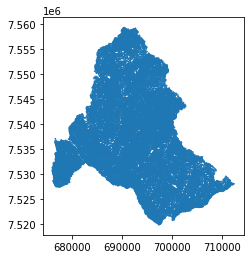

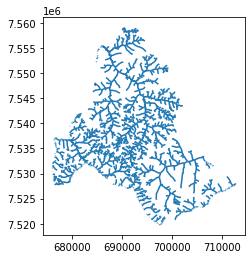

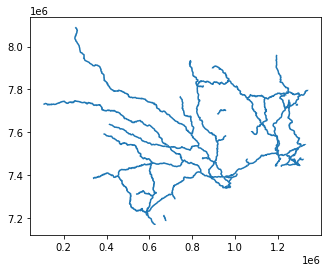

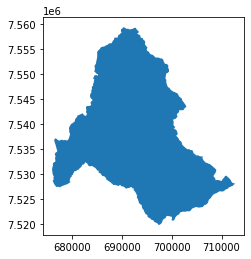

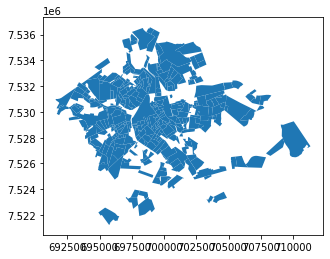

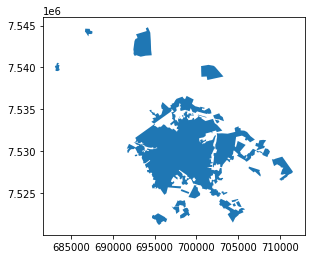

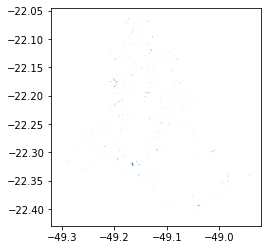

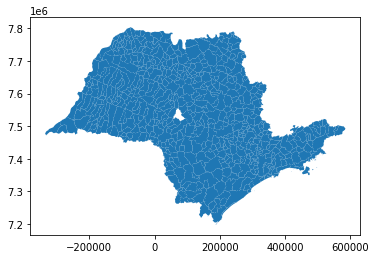

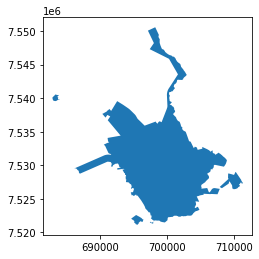

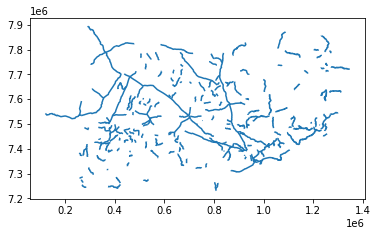

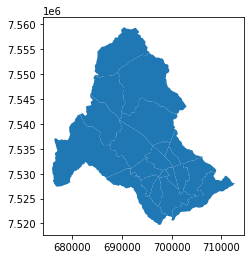

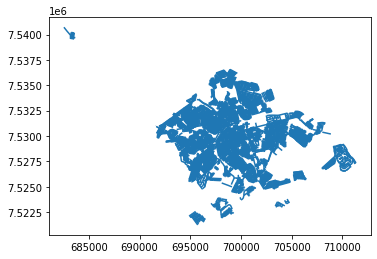

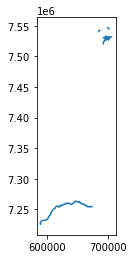

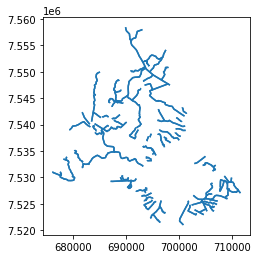

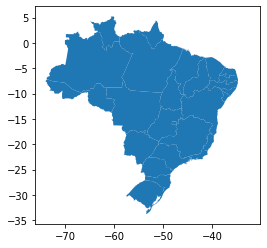

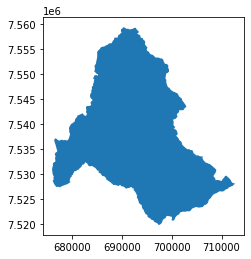

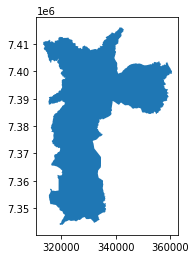

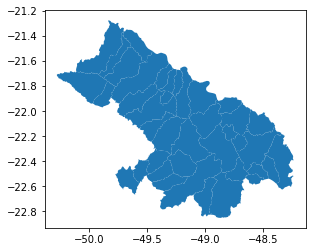

In [17]:
curvas_10.plot()
cursos_dagua.plot()
ferrovia.plot()
limite_municipal.plot()
loteamentos_bauru.plot()
mancha_urbana.plot()
massa_dagua.plot()
municipios_sp.plot()
perimetro_urbano_2018.plot()
rodovias.plot()
setores_planejamento.plot()
vias_locais.plot()
vias_principais.plot()
vias_rurais.plot()
estados_ibge.plot()
perimetro_municipal.plot()
# perimetro_sp.plot()
regiao_adm.plot()

In [19]:
# LineString
curvas_10.geometry.head()
cursos_dagua.geometry.head()
ferrovia.geometry.head()
rodovias.geometry.head()
vias_locais.geometry.head()
vias_principais.geometry.head()
vias_rurais.geometry.head()

# Polygon
municipios_sp.geometry.head()
regiao_adm.geometry.head()
loteamentos_bauru.geometry.head()
mancha_urbana.geometry.head()
massa_dagua.geometry.head()
perimetro_urbano_2018.geometry.head()
setores_planejamento.geometry.head()


# similares (o perimetro tem a coluna da area)
limite_municipal.geometry.head()
perimetro_municipal.geometry.head()

# estados_ibge.geometry.head()
# perimetro_sp.geometry.head()

0    POLYGON ((-49.38350 -22.75036, -49.38314 -22.7...
1    POLYGON ((-49.13507 -22.05103, -49.13492 -22.0...
2    POLYGON ((-49.45910 -22.24068, -49.45910 -22.2...
3    POLYGON ((-49.38302 -21.91294, -49.38342 -21.9...
4    POLYGON ((-48.86932 -22.02221, -48.86080 -22.0...
Name: geometry, dtype: geometry

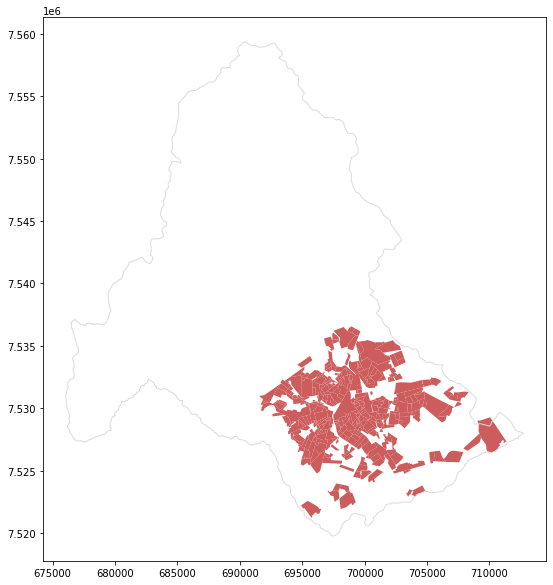

In [164]:
# Area do limite municipal
ax = limite_municipal.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
# Area da regiao adm
# ax = regiao_adm.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

#perimetro urbano
# perimetro_urbano_2018.plot(color='lavender', ax=ax)

# mancha urbana
# mancha_urbana.plot(color='salmon', ax=ax)

# loteamentos
# loteamentos_bauru.plot(color='indianred', ax=ax)

# relevo
curvas_10.plot(color='antiquewhite', ax=ax)

# cursos dagua
# cursos_dagua.plot(color='lightskyblue', markersize=2, ax=ax)

#vias locais
# vias_locais.plot(color='silver', ax=ax)

#vias rurais
# vias_rurais.plot(color='moccasin', ax=ax)

## arrumar

# massa dagua
# massa_dagua.plot(color='blue', ax=ax)

#setores planejamento
# setores_planejamento.plot(color='magenta', ax=ax)

# vias principais
# vias_principais.plot(color='yellow', ax=ax)

#ferrovia
# ferrovia.plot(color='black', markersize=1, ax=ax)

# rodovias
# rodovias.plot(color='yellow', ax=ax)

In [113]:
perimetro_municipal.head()

,OBJECTID,Shape_Leng,Shape_Area,geometry,Area
0,1,152601.229838,67194.389471,"POLYGON Z ((690465.895 7559334.197 0.000, 6905...",671943.894714


In [115]:
limite_municipal.head()

,OBJECTID,Shape_Leng,Shape_Area,geometry
0,1,152601.229838,67194.389471,"POLYGON Z ((690465.895 7559334.197 0.000, 6905..."


In [69]:
print(perimetro_municipal.crs)

epsg:31982


In [90]:
# Calcula a area de cada poligono no dataframe
perimetro_municipal.loc[:, "Area"] = perimetro_municipal.geometry.area / 1000

print("Area de Bauru: {} quilometros quadrados".format(perimetro_municipal.Area.sum()))
print("CRS:", perimetro_municipal.crs)
perimetro_municipal.head()

Area de Bauru: 671943.8947141055 quilometros quadrados
CRS: epsg:31982


,OBJECTID,Shape_Leng,Shape_Area,geometry,Area
0,1,152601.229838,67194.389471,"POLYGON Z ((690465.895 7559334.197 0.000, 6905...",671943.894714


In [92]:
# Calcula a area de cada poligono no dataframe
loteamentos_bauru.loc[:, "Area"] = loteamentos_bauru.geometry.area / 1000

print("Loteamentos de Bauru: {} quilometros quadrados".format(loteamentos_bauru.Area.sum()))
print("CRS:", loteamentos_bauru.crs)
loteamentos_bauru.head()

Loteamentos de Bauru: 90740.90024575173 quilometros quadrados
CRS: epsg:31982


,Id,nome,OCUPADO,geometry,Area
0,0,LOTEAMENTO MÁRIO LUIZ RODRIGUES DO PRADO,PARCIAL,"POLYGON ((702269.710 7535445.992, 702331.422 7...",1138.560659
1,0,QUINTA DA BELA OLINDA,PARCIAL,"POLYGON ((701627.870 7535258.616, 701514.573 7...",2854.097685
2,0,CONJ. HAB. ISAURA PITTA GARMS,PARCIAL,"POLYGON ((702322.289 7534365.099, 702952.330 7...",398.017190
3,0,PARQUE GIANSANT,PARCIAL,"POLYGON ((703153.803 7534056.663, 703288.061 7...",238.988354
4,0,CHÁCARAS SÃO JOÃO,PARCIAL,"POLYGON ((702177.609 7534304.923, 702197.023 7...",401.215348


Interativos

In [124]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [162]:
# Create a map
m_1 = folium.Map(location=[-22.3154,-49.0615], tiles='openstreetmap', zoom_start=12)

# Display the map
m_1

In [166]:
setores_planejamento.head()

,Id,SETOR,setor_num,geometry
0,0,7,7.0,"POLYGON ((696156.828 7535697.556, 698348.933 7..."
1,0,8,8.0,"POLYGON ((698707.646 7533351.394, 698698.358 7..."
2,0,9,9.0,"POLYGON ((699421.032 7535405.640, 699385.864 7..."
3,0,12,12.0,"POLYGON ((700262.856 7531298.519, 700383.241 7..."
4,0,11,11.0,"POLYGON ((700262.856 7531298.519, 700545.245 7..."


In [170]:
# GeoDataFrame com limites geograficos dos setores do planejamento de Bauru
setores = setores_planejamento[["SETOR", "geometry"]].set_index("SETOR")
setores.head()

,geometry
SETOR,
7,"POLYGON ((696156.828 7535697.556, 698348.933 7..."
8,"POLYGON ((698707.646 7533351.394, 698698.358 7..."
9,"POLYGON ((699421.032 7535405.640, 699385.864 7..."
12,"POLYGON ((700262.856 7531298.519, 700383.241 7..."
11,"POLYGON ((700262.856 7531298.519, 700545.245 7..."


In [173]:
# Create a base map
m_2 = folium.Map(location=[-22.3154,-49.0615], tiles='openstreetmap', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=setores.__geo_interface__, 
          #  data= dados, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Setores de Bauru'
          ).add_to(m_2)

# Display the map
m_2

In [176]:
m = folium.Map(location=[-22.3154,-49.0615], tiles="Stamen Toner", zoom_start=12)

folium.Circle(
    radius=100,
    location=[-22.3154,-49.0615],
    popup="The Waterfront",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[-22.3154,-49.0615],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)


m

In [178]:
m = folium.Map(location=[-22.3154,-49.0615], tiles="Stamen Terrain", zoom_start=12)

m.add_child(folium.LatLngPopup())

m